<a href="https://www.kaggle.com/code/cielokim/sentiment-analysis-amazon-fine-food-reviews?scriptVersionId=102292567" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Sentiment Analysis: Amazon Fine Food Reviews (Word Cloud)

Sentiment analysis, also called opinion mining is the process of understanding the opinion of an author about a subject, answering the question, "What is the emotion or opinion of the author of the text about the subject discussed?"

Sentiment analysis usually has 3 elements: 
1. opinion (polarity such as pos, neutral, neg) / emotion (e.g. joy, anger, surprise, disgust)
2. subject (e.g. a book, a movie, or a product)
3. opinion holder (entity expressing the opinion)

In [1]:
# import libraries
import pandas as pd
import numpy as np
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns

## About dataset

### **Context**
This dataset consists of reviews of fine foods from amazon. The data span a period of more than 10 years, including all ~500,000 reviews up to October 2012. Reviews include product and user information, ratings, and a plain text review. It also includes reviews from all other Amazon categories.

### **Contents**
Reviews.csv: Pulled from the corresponding SQLite table named Reviews in database.sqlite
database.sqlite: Contains the table 'Reviews'

Data includes:

- Reviews from Oct 1999 - Oct 2012
- 568,454 reviews
- 256,059 users
- 74,258 products
- 260 users with > 50 reviews

Column details:

- Id: Row Id
- ProductId: Unique identifier for the product
- UserId: Unqiue identifier for the user
- ProfileName: Profile name of the user
- HelpfulnessNumerator: Number of users who found the review helpful
- HelpfulnessDenominator: Number of users who indicated whether they found the review helpful or not
- Score: Rating between 1 and 5
- Time: Timestamp for the review
- Summary: Brief summary of the review
- Text: Text of the review

### **Acknowledgements**

If you publish articles based on this dataset, please cite the following paper:

J. McAuley and J. Leskovec. [From amateurs to connoisseurs: modeling the evolution of user expertise through online reviews](http://i.stanford.edu/~julian/pdfs/www13.pdf). WWW, 2013.



In [2]:
# read data

df = pd.read_csv('../input/amazon-fine-food-reviews/Reviews.csv')
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [3]:
# view if there is missing data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568454 entries, 0 to 568453
Data columns (total 10 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   Id                      568454 non-null  int64 
 1   ProductId               568454 non-null  object
 2   UserId                  568454 non-null  object
 3   ProfileName             568438 non-null  object
 4   HelpfulnessNumerator    568454 non-null  int64 
 5   HelpfulnessDenominator  568454 non-null  int64 
 6   Score                   568454 non-null  int64 
 7   Time                    568454 non-null  int64 
 8   Summary                 568427 non-null  object
 9   Text                    568454 non-null  object
dtypes: int64(5), object(5)
memory usage: 43.4+ MB


In [4]:
# check the unique number of products
len(df.ProductId.unique())

74258

## How many positive reviews are there?

In [5]:
# sort data frame by score value in descending order and with index changed based on this sorting.
df.sort_values(by = ['Score'], ascending = False, ignore_index = True, inplace = True)

In [6]:
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,338695,B001SB3ZHU,A1F4L64W5BREGX,Gary R. Howe,0,0,5,1304380800,Bennets,Bennets Chili Sauce is the greatest for making...
2,338712,B001VNFOZ6,A15P7Q1WK4RED0,Terri Fountain,6,6,5,1293667200,Love 5 Spice,This spice is so hard to find where I live. S...
3,338711,B001VNFOZ6,A2ZE8BSZ5MMEOP,"Jasmine ""Uniquely Yours""",14,14,5,1261699200,"Delicious, fresh and convenient Five Spice powder","Frontier Five Spice Powder is a value, also, c..."
4,338710,B002R83LW2,AJ7L4FL7XLT50,"J. Torres ""judeandjenny""",0,0,5,1294185600,Best home brew coffee!,As did another reviewer... I tried this coffee...


/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


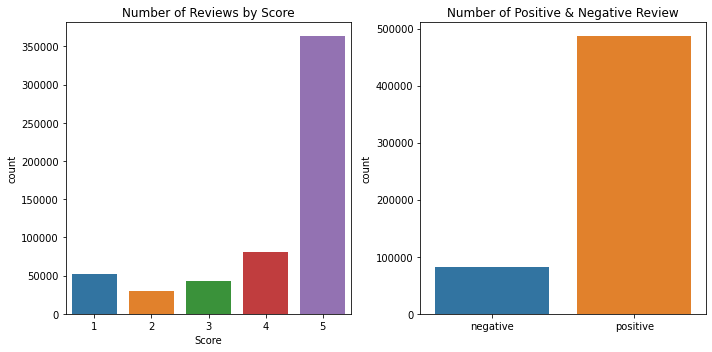

In [7]:
# find the number of reviews by score
fig, ax = plt.subplots(1, 2,figsize = (10, 5))

sns.countplot(df.Score, ax = ax[0])
ax[0].set_title('Number of Reviews by Score')

# find the proportion of each score counts
ratio = ['positive' if score >= 3 else 'negative' for score in df.Score]

sns.countplot(x= ratio, ax = ax[1], order = ['negative', 'positive'])
ax[1].set_title('Number of Positive & Negative Review')
plt.tight_layout()
plt.show()

#### Among 568,454 reviews for 74,258 products, 78% is positive (score above 3) about product, 14% negative (score below 3) and 8% neutral (score 3).

## Longest and Shortest Reviews

In [8]:
# save length of review text : length_review
length_review = df.Text.str.len()

# print the longest and shortest length of reviews
print('The Longest Length of Review: ', max(length_review), '\n')
print('The Shortest Length of Review: ', min(length_review))

The Longest Length of Review:  21409 

The Shortest Length of Review:  12


## Get the sample of data

Rows over 568,454 are too heavy to get fast analysis, so I will decrease the size of data to 1/20 (which is 28,422 rows) maintaining proportion of scores above. 

In [9]:
# group the data frame by score and apply sample fration ratio with 5% for each score group
df_rd = df.groupby('Score',as_index = False).apply(lambda x: x.sample(random_state = 1,frac=0.05))

# reset index
df_rd.reset_index(drop = True, inplace = True)

# view the size of new data frame
df_rd.shape

(28422, 10)

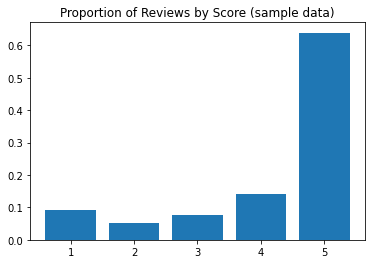

In [10]:
# get the proportion of reviews by score with reduced dataset
score_ratio2 = df_rd.Score.value_counts(normalize = True)

plt.bar(x = score_ratio2.index, height = score_ratio2.values)
plt.title('Proportion of Reviews by Score (sample data)')
plt.show()

#### the proportion of score of reduced data frame is the same as that of the original data frame. 

## What languages are used in reviews?

Amazon product reviews especially when the product is sold in multiple countries, are written in various languages.
**langdetect library** provides function to detect the language of a string and runs faster. Let's see if there is any non-english language in reviews.

In [11]:
!pip install langdetect

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 kB 2.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... - done
  Created wheel for langdetect: filename=langdetect-1.0.9-py3-none-any.whl size=993242 sha256=61e890cf6dd99f224729925304b8d9adab131ce08d6ae674bf756fd02b0105b2
  Stored in directory: /root/.cache/pip/wheels/c5/96/8a/f90c59ed25d75e50a8c10a1b1c2d4c402e4dacfa87f3aff36a
Successfully built langdetect


In [12]:
# import detect_langs fuction from the library
from langdetect import detect_langs, DetectorFactory

#To enforce consistent results, call following code before the first language detection
DetectorFactory.seed = 0

In [13]:
# iterate over the first five reviews and detect their language
list(map(detect_langs, df.Text[:2]))

[[en:0.9999957899445797], [en:0.9999969067008874]]

#### **detect_langs** function returns a list of a pair of a language and probability. 
> [language: probability]
#### I will extract a language part only and test if there is any non-english language. 

In [14]:
# iterate over the reviews and detect their language
def language_detective(review):
    # detect a language, get a value inside a list, and convert into string.
    result = str(detect_langs(review)[0])
    # split a string with colon and get a language part
    lang = result.split(':')[0]
    # test if a language is English
    return lang


In [15]:
# apply function and get the list of language for each review.
lang_list = [*map(language_detective, df_rd.Text)]

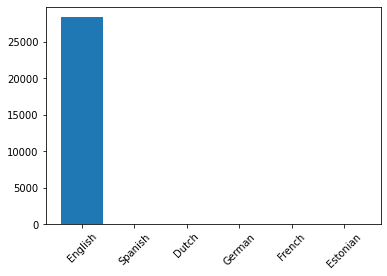

In [16]:
# see if there is any non-english language

l = Counter(lang_list)
plt.bar(['English', 'Spanish', 'Dutch', 'German', 'French', 'Estonian'], l.values())
plt.xticks(rotation = 45) 
plt.show()

In [17]:
# add language values in new column
df_rd['Language'] = lang_list

df_rd.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,Language
0,44409,B0018OMTOM,A2PW5XDAP9247R,Jaynes,1,3,1,1212278400,Deadly treat,I bought these at a local store. I broke up th...,en
1,468571,B001XCRU3O,A2MNU4N3R12BNK,G-View Jenn,0,0,1,1335484800,Incredibly Overpriced!,"Because of the way this is listed, I was expec...",en
2,518560,B0002YW26E,A1V0A5KLD8NV1K,helenvan,0,0,1,1325203200,Of no use,It's been placed in various places throughout ...,en
3,523920,B004JGQ15Y,A3TIL1PC2ZE97B,J. M WILINSKY,0,4,1,1301529600,Not fit to eat!,I am outraged that in these hard economic time...,en
4,335834,B0009XQWDM,A2WR1BNMZ03BKH,wolfen,1,2,1,1224374400,Used once and switched,"I have a new Akita puppy, and bought the Canid...",en


In [18]:
# view reviews which were dectected as non-english language
df_rd.loc[(df_rd.Language != 'en'), ['Text','Language']]

,Text,Language
177,solo estoy poniendo este mensaje porque no he ...,es
4165,it not that great. it was very different. a lo...,nl
5296,WE PURCHASED THIS SAMPLER PACK FOR MY WIFE'S B...,de
9490,buen vendedor lo recomiendo el envio muy rapid...,es
10476,A FEW SHAKES OF THIS DOG TREAT ON THE SAME OLD...,de
13838,I TAKE THIS ON KAYAKING TRIPS INTO THE FLORIDA...,de
14154,KIND BAR WALNUT & DATE WAS SO DELICIOUS AFTER ...,de
14531,"Excelente, Muy buena presentaci&oacute;n del p...",es
21000,Best Margarita Mix Ever ... If you ever get a ...,fr
21485,Lo compr&eacute; como regalo para mi familia e...,es


In [19]:
print('Number of Non-English Reviews: ', len(df_rd.loc[(df_rd.Language != 'en'), ['Text','Language']]))

Number of Non-English Reviews:  12


#### 12 out of 28,422 reviews are detected as non-english, and when reading the reviews, only 4 reviews were actually written in non-english while the rest of them were written in English, but were mistakenly detected as different language due to writting style such as upper case, lack of spacing, and use of onomatopoeia.

## What are most frequest words in positive/negative reviews?

Using **word cloud**, I will demonstrate the most frequent words in positive & negative reviews.

A word cloud is an image composed with words with different sizes and colors. As a quick scan of the image can provide an overall sense of the text, a word cloud can be especially useful in sentiment analysis.

### Get Data Sample for Sentiment Analysis
In current dateset, 78% of reviews are scored postively and 14% negatively, so for the comparison of two groups, I will extract 10,000 reviews of positive and negative reviews respectively using random choice function.

In [20]:
# random-select the index of positive reviews (scored 5) and of negative reviews (scored 1)
np.random.seed(6)
pos_i20k = np.random.choice(df.loc[df.Score == 5].index, size = 10000, replace = False)
neg_i20k = np.random.choice(df.loc[df.Score == 1].index, size = 10000, replace = False)

In [21]:
# convert data frame of reviews into list
pos_rv_list = df.loc[pos_i20k, 'Text'].tolist()
neg_rv_list = df.loc[neg_i20k, 'Text'].tolist()

# compile all negatives reviews strings into one string
pos_rv_txt = ''.join(pos_rv_list)
neg_rv_txt = ''.join(neg_rv_list)

In [22]:
# view the negative review text up to 10,000 letters
print(pos_rv_txt[:10000])

We love this!  We've purchased all the ones in the market like Vita Coco, Taste Nirvana, ONE, C2O, Amy & Brian and found that this one tastes the freshest.  It's the closest in taste to drinking right out of the coocnut.  I also wish there is subscribe and save for this.  Would love the additional savings and the auto ship on this.First off, I think the reviews on this page are confusing.  It seems to me there is a mix of people who bought the container of oil and those that bought the pills.<br /><br />I bought the pills and am enjoying them very much.  I read news reports on how coconut oil may help with Alzheimers, diabetes and diet so I thought I'd try them since I have issues with all of these in my family line.  I feel more mentally focused and alert since I've started taking them a week or so ago.  I definitely plan to continue to take the pills.<br /><br />They are large as many people have noted (see my photo uploaded with the quarter), but they are not any bigger than any oth

In [23]:
# view the negative review text up to 10,000 letters
print(neg_rv_txt[:10000])

I loved canned salmon.  I eat it almost every day.  I've tried the high priced Vital Choice, supermarket brands, and decided to give this "gourmet-ish" brand a try.  I tried 4 cans of it.  Each one was almost inedible.  The amount of salt in this salmon makes it hard to palate.  I actually didn't eat the last 2 cans I opened.  They went right in the trash after a taste.  The salmon is fishy, and the extreme salt taste made me want to throw up.  Avoid this salmon.<br />Vital Choice is outstanding 30% of the time, and the rest of the time it's not much different than my supermarket brand.<br />There are obviously variations between cans with each brand.  The best priced option is here on Amazon.  Amazon sells Rubinsteins red sockeye salmon and it is the same manufacturer as my supermarket brand, but sold cheaper here on Amazon.  I will continue to purchase the following product here on Amazon but I will NEVER buy anything from SeaBear again.<br /><a href="http://www.amazon.com/gp/product

In [24]:
# remove html code, '<br />' from the text
pos_rv_txt = pos_rv_txt.replace('<br />', ' ')
neg_rv_txt = neg_rv_txt.replace('<br />', ' ')

# remove double space into one.
pos_rv_txt = pos_rv_txt.replace('  ', ' ')
neg_rv_txt = neg_rv_txt.replace('  ', ' ')

## Tokenizing Text & Removing Stop Words

Using NLTK libary, I will tokenize the text of reviews and clean up all stow words.

Stop words are those words in natural language that have a very little meaning such as 'or', 'is', 'the', etc. They won't provide little to no unique information, so I will remove them using **Spacy** library, which is one of the Python libraries for Natural Language Processing. Spacy supports stop word removal (see the list of stop words in the corpus module).

In [25]:
# import libraries
from nltk.tokenize import word_tokenize
import spacy

In [26]:
# convert text into lower case as NLTK is case sensitive
pos_rv_txt = pos_rv_txt.lower()
neg_rv_txt = neg_rv_txt.lower()

In [27]:
# view
pos_rv_txt[:100]

"we love this! we've purchased all the ones in the market like vita coco, taste nirvana, one, c2o, am"

In [28]:
# import the word cloud function and pyplot for display
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [29]:
from nltk.tokenize import word_tokenize
import spacy

# load the stop words of English language 
en = spacy.load('en_core_web_sm')
sw_spacy = en.Defaults.stop_words


In [30]:
def token_filter(text, stopwords):
    """Create a list of tokenized words without stopwords and non-alphabetical characters."""
    
    # tokenize review texts
    tokens = word_tokenize(text)

    # take only meaningful alphabetical characters 
    token_words = [w for w in tokens if w.isalpha()]
    meaningful_words = [w for w in token_words if w not in stopwords]
    
    return meaningful_words


In [31]:
# apply a function to obtain a list of meaningful tokenized words 
pos_mwords = token_filter(pos_rv_txt, sw_spacy)
neg_mwords = token_filter(neg_rv_txt, sw_spacy)

In [32]:
# view
pos_mwords[:5]

['love', 'purchased', 'ones', 'market', 'like']

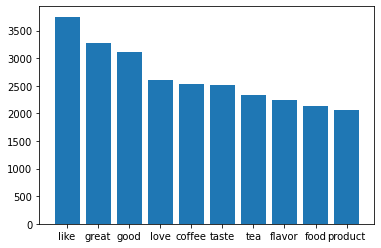

In [33]:
# view the most common words of meaningful_words
pos = Counter(pos_mwords).most_common()[:10]
pos = dict(pos)
plt.bar(pos.keys(), pos.values())
plt.show()

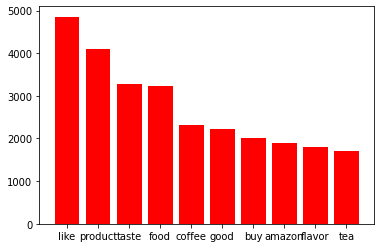

In [34]:
# view the most common words of meaningful_words
neg = Counter(neg_mwords).most_common()[:10]
neg = dict(neg)
plt.bar(neg.keys(), neg.values(), color = 'r')
plt.show()

In [35]:
# manually remove some more stop words
removing_words = ['like', 'good', 'great', 'love', 'loves','little', 'bad', 'best', 'better','product', 
                  'buy', 'amazon', 'food', 'foods', 'tried', 'bought', 'eat', 'want',
                  'try', 'got', 'thought', 'know', 'way', 'use', 'think', 'order', 
                  'ordered', 'find', 'products', 'product', 'item', 'items' 'tasted', 'drink', 'stuff', 'found',
                 'away', 'received', 'sure', 'purchased', 'going', 'buying', 'thing', 'maybe', 'wo',
                  'said', 'looking', 'actually', 'lot', 'purchase', 'makes', 'recommend', 'flavor', 'taste', 
                  'tastes', 'time', 'bag', 'box', 'brand']

pos_mwords2 = [word for word in pos_mwords if word not in removing_words]
neg_mwords2 = [word for word in neg_mwords if word not in removing_words]

In [36]:
# compile multiple strings into one string
pos_rv_txt2 = ','.join(pos_mwords2)
neg_rv_txt2 = ','.join(neg_mwords2)

In [37]:
def word_cloud_maker(text):
    wcloud = WordCloud(background_color = 'white', random_state = 1).generate(text)
    
    plt.imshow(wcloud, interpolation = 'bilinear')
    plt.axis('off')
    
    plt.show()

Word Cloud - Positive Reviews


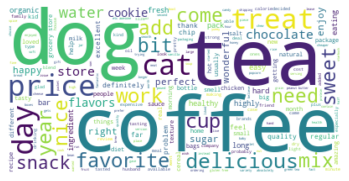

Word Cloud - Negative Reviews


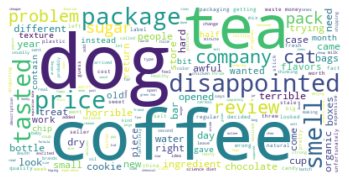

In [38]:
# create a word cloud
print('Word Cloud - Positive Reviews')
word_cloud_maker(pos_rv_txt2)
print('Word Cloud - Negative Reviews')
word_cloud_maker(neg_rv_txt2)

#### It appears the words 'dog', 'coffee', and 'tea' were the most frequent in both positive and negative reviews, which may indicate they are the most transactioned items in Amazon Fine Foods and hence they have a large volume of reviews.   

#### Let's see what a word cloud look like when removing those three words. What are the next most popular words?

In [39]:
# remove the words below 
removing_words2 = ['dog', 'coffee', 'tea']

pos_mwords3 = [word for word in pos_mwords2 if word not in removing_words2]
neg_mwords3 = [word for word in neg_mwords2 if word not in removing_words2]

In [40]:
# compile multiple strings into one string
pos_rv_txt3 = ','.join(pos_mwords3)
neg_rv_txt3 = ','.join(neg_mwords3)

Word Cloud - Positive Reviews


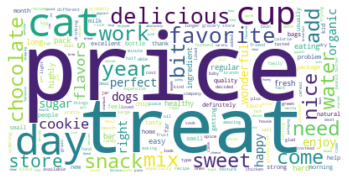

Word Cloud - Negative Reviews


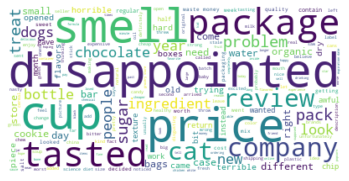

In [41]:
# create and generate a word cloud image
print('Word Cloud - Positive Reviews')
word_cloud_maker(pos_rv_txt3)
print('Word Cloud - Negative Reviews')
word_cloud_maker(neg_rv_txt3)

#### The word clouds started to illustrate conspicuous difference after eliminating the shared words. The word, 'price' and 'treat' are more evident in the positive reviews while the word, 'smell' in the negative reviews.  

#### You can easily guess the customers are satisfied with Amazon's price. However, the other words require some more context for understanding. 

## Word Cloud Focusing On A Particular Keyword

Through the practice above, we have learned the most frequent kewords in postive reviews and negative reviews.
- The Most Frequent Words in Both Reviews: **dog, coffee, tea**
- The Frequent Words in Positive Reviews: **price, treat**
- The Frequent Words in Negative Reviews: **smell**


In order to delve into the context of the keywords above, we are going to find the sentences including each keywords from the reviews, and generate a word cloud to guess the meaning of those sentences. To avoid repetition of codes, I will define functions for this task.

In [42]:
from PIL import Image

In [43]:
def text_keyword(text, keyword, extra_stopword):
    """collect sentences with a certain keyword from a text and remove stopwords from them.
    
    Args:
    text(str): a string to split into sentences (delimiter: '.')
    keyword(str): a keyword that the sentence should include
    extra_stopword(list): a list of stopwords to add
    
    Returns:
    tokenized words (str) from the sentences which had the keyword of input without stopwords
    Counter object that counts the frequency of athe words
    """
    
    # split the text into sentences 
    sentence = text.split('.')
    
    # pick only sentences containing the keyword
    keyword_sen = [review for review in sentence if keyword in review]
    
    # removing duplicates
    keyword_sen = set(keyword_sen)
    
    # count the number of sentences
    print('The number of sentences with the keyword, ', keyword, ': ', len(keyword_sen))
    
    # convert the list of sentences into one string again
    string = ' '.join(keyword_sen)
    
    # convert the string into lowercase
    string = string.lower()
    
    #tokenize
    token = word_tokenize(string)
    
    #filter only alphabetical characters and remove stop words
    token_filtered = [w for w in token if w.isalpha()]
    stopwords_updated = list(sw_spacy) + removing_words + extra_stopword
    token_filtered = [w for w in token_filtered if w not in stopwords_updated]
    
    # compile into one string
    string_filtered = ','.join(token_filtered)

    return string_filtered, list(keyword_sen), Counter(token_filtered)
    

In [44]:
def plot_word_cloud(text, col_threshold = 30, image_path = None):
    """create a unigram word cloud.
    
    Args:
    text(str) : a text to create a word cloud with
    col_threshold(int): a collocation threshold of a word cloud
    image_path(str): a image pile path for word cloud shape
    
    
    Returns:
    Word Cloud
    """
    
    # create word cloud
    plt.figure(figsize=(10,5))
    
    # add mask
    if image_path != None:
        mask = np.array(Image.open(image_path))
    else:
        mask = None
    
    wcloud = WordCloud(background_color = 'white', random_state = 1, collocation_threshold = col_threshold, mask= mask).generate(text)
    # display
    plt.imshow(wcloud, interpolation = 'bilinear')
    
    # without axis
    plt.axis('off')

In [45]:
def keyword_cloud(text, keyword, img_path = None):
    token, sentences, token_counter = text_keyword(text, ' '+ keyword, [keyword, keyword + 's', keyword + 'ed'])
    print(token_counter.most_common(10))
    
    plot_word_cloud(token, 30, img_path)
    i_list = np.random.choice(len(sentences), size = 3, replace = False)
    print('\nSentences with this keyword: \n')
    
    for i in i_list:
        print(sentences[i])

## What is the context of the keyword, 'treat' in the positive reviews?

The number of sentences with the keyword,   treat :  1159
[('dog', 216), ('dogs', 104), ('cat', 64), ('healthy', 57), ('training', 54), ('delicious', 43), ('day', 42), ('small', 40), ('cats', 39), ('perfect', 36)]

Sentences with this keyword: 

 next, we are trying the calming treat line for her thunderstorm anxieties and different flavors in the happy hip line
 very pleaseour pet loves having greenies as treat, she gets crazy every time she hears or see us opening the package
the title says it all! these butter biscuits are divine! everyone loves them--my parents, my students, my colleagues, and, of course, me! you will love them, too!my aussies sure working for this treat! great mini size, not messy, and easy to take with you and dispense as training treats


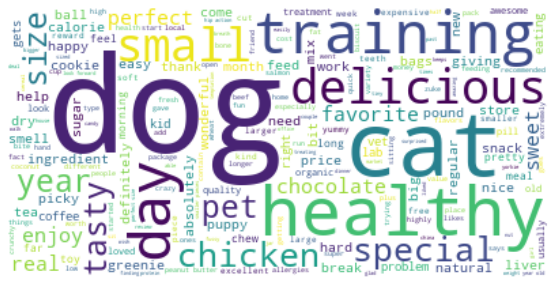

In [46]:
keyword_cloud(pos_rv_txt, 'treat')

#### The word, 'dog' is mentioned the most, which is 348 times in the sentences where the word, 'treat' is included. Other frequent words are 'healthy', 'training', and 'cat'. Therefore, what the word, 'treat' in the positive reviews refers to could be **dog/cat treats**. You can assume one of the biggest groups of positive reviewers is the buyers for dog and cat treats and they thought favorably on the products in the aspect of pets' wellness and training.

## What is the context of the keyword, 'smell' in the negative reviews?

The number of sentences with the keyword,   smell :  844
[('opened', 65), ('tasted', 50), ('tea', 47), ('coffee', 42), ('awful', 41), ('horrible', 40), ('dog', 36), ('strong', 34), ('worse', 24), ('opening', 24)]

Sentences with this keyword: 

 i would pay more for the customer service as well as erythritol that smells normal
the smell from your rush is gonna cost a lot of goodwill
 it smells vile


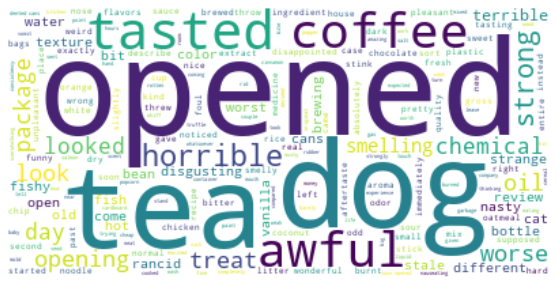

In [47]:
keyword_cloud(neg_rv_txt, 'smell')

#### From the word cloud for the keyword, 'smell', 'tea' and 'dog' are the most highlighted words. The complaints about smell could largely be about dog or tea items. That being said, the number of senteneces with this keyword is only 844, which is relatively low in comparison with the other keywords'. Therefore, the ordour issue on dog and tea items could be not as significant as the other issues.

## What is the context of the keyword, 'coffee' in the positive and negative reviews?

The number of sentences with the keyword,   coffee :  2276
[('cup', 282), ('strong', 156), ('tea', 114), ('keurig', 109), ('morning', 97), ('bold', 91), ('favorite', 89), ('roast', 87), ('starbucks', 87), ('blend', 85)]

Sentences with this keyword: 

 since the option is not giving a 3 year old cookies i don't mind some crumbs!i dont know who this gloria jean is but i sure love her coffee beans
the coffee was great
as a lover of flavored coffees this is one of my favorites


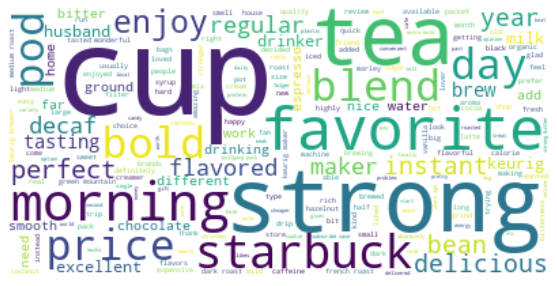

In [48]:
# positive reviews
keyword_cloud(pos_rv_txt, 'coffee')

The number of sentences with the keyword,   coffee :  1906
[('cup', 208), ('flavored', 107), ('instant', 97), ('roast', 74), ('strong', 69), ('weak', 61), ('bitter', 60), ('keurig', 60), ('pods', 57), ('chocolate', 57)]

Sentences with this keyword: 

99 although i've been hoping they would come out with a larger package of this coffee the price is almost double
 seeds have extra natural protections which will not allow for the best extraction of nutrients using hot water alone; this is why coffee beans need to be ground during preparation
 in other k-cups there is a filter and the coffee grinds are left in the in the filter


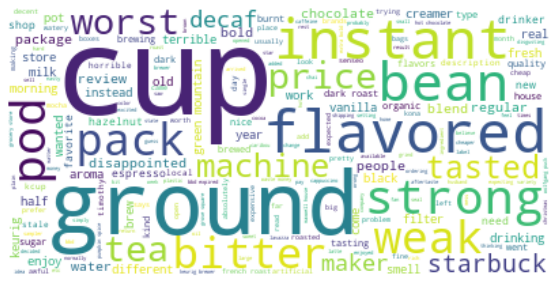

In [49]:
# negative reviews
keyword_cloud(neg_rv_txt, 'coffee')

#### The noticeable difference is that the word, 'strong' is more consipicuous in the positive reviews while the word, 'instant' and 'pod' in the negative ones. That indicate **strong taste** of coffee could be greatly enjoyed by the customers; **instant coffees** may need some tweak.

## What is the context of the keyword, 'dog' in the positive and negative reviews?

The number of sentences with the keyword,   dog :  1545
[('treats', 206), ('treat', 109), ('small', 69), ('dry', 58), ('years', 55), ('healthy', 52), ('happy', 48), ('teeth', 46), ('ingredients', 46), ('quality', 45)]

Sentences with this keyword: 

 for dogs with sensitive digestion these are gluten free and are made with high protein grain
i used to feed purina lamb and rice to my dogs, but i was finding my young porty was having trouble with it, and my 15 yr old would eat a few bits and then leave her dish
]),the other was dog food analysis ([


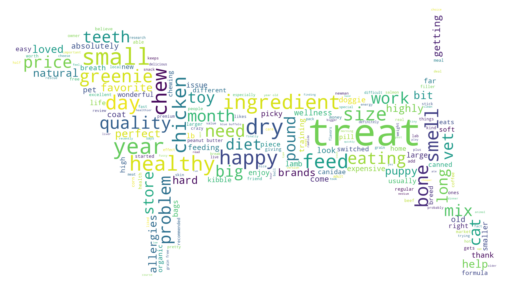

In [50]:
# positive reviews
keyword_cloud(pos_rv_txt, 'dog', '../input/dog-image/dog-black-silhouette.jpeg')

The number of sentences with the keyword,   dog :  1700
[('treats', 188), ('china', 101), ('chicken', 93), ('treat', 83), ('ingredients', 56), ('sick', 55), ('chew', 53), ('vet', 51), ('feed', 49), ('feeding', 48)]

Sentences with this keyword: 

 it may cost more to buy usa made, but it is worth it in the long run if your dogs avoid dying an early death that could have been avoided
 corn it is just a cheap filler that can cause dogs to actually eat more to feel full, poop out more, and retain less nutrients
one of my friend's dog just died two days ago because of these treats


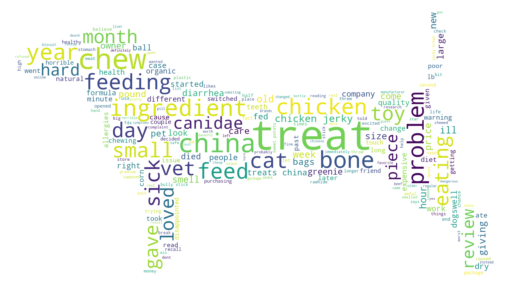

In [51]:
# negative reviews
keyword_cloud(neg_rv_txt, 'dog', '../input/dog-image/dog-black-silhouette.jpeg')

#### The shared keywords in dog-related senteneces are 'chew', 'treat', 'ingredient', which implies dog treats and chews are one of best selling items and dog owners are ingredient-conscious when shopping the items. In that sense, the word, 'china' which made keywords in the negative reviews could indicate the customers for dog foods are nervous about 'Made in China' products as in safety.  

The number of sentences with the keyword,   tea :  2223
[('green', 273), ('coffee', 135), ('cup', 130), ('black', 120), ('bags', 110), ('water', 101), ('hot', 96), ('iced', 88), ('favorite', 82), ('drinking', 80)]

Sentences with this keyword: 

 it is a hearty, flavorful tea and i have been using it for several years
 great deal for a great tea! on ward to health and warmth! ;)i love this formula
 i'm not normally a tea drinker, but i will definitely be ordering some of this


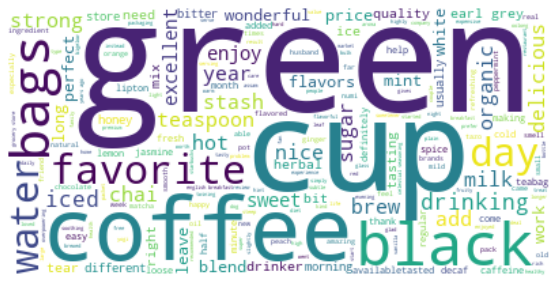

In [52]:
# positive reviews
keyword_cloud(pos_rv_txt, 'tea')

The number of sentences with the keyword,   tea :  1394
[('green', 195), ('bags', 81), ('jasmine', 65), ('black', 60), ('cup', 58), ('chai', 58), ('coffee', 55), ('quality', 40), ('drinking', 36), ('decaf', 35)]

Sentences with this keyword: 

 contains four different types of teas specifically formulated to combat the sniffles
 i used two teaspoons in my tea
 though "english breakfast tea", (and "darjeeling", and even fortum & mason's "royal blend" tea are different from the usual "orange pekoe" or "orange pekoe and black" teas, one usually gets bagged in the supermarket, these other 'rarified' teas are far more like the usual tea than jasmine tea


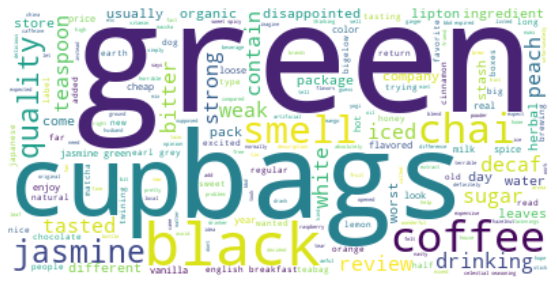

In [53]:
# negative reviews
keyword_cloud(neg_rv_txt, 'tea')

#### The word 'tea' has 'green' as the most frequent word in both positive and negative reviews; **green tea** could be the most transactioned one among various tea products. As for difference between two word clouds, the word 'coffee' is more prominent in the positive reviews whereas the negative reviews highlights the word, 'bags'. The possible interpretation on that could be that some customers may think favorably on tea as an alternative to coffee; on the other hand, some customers may have problem with the quantity of tea bags or breakage on tea bags.

## Summary



#### 1. Proportion of Scores

Out of total number of reviews, 568,454, 78% is positive reviews (score above 3 out of 5), 14% negative (score below 3), 8% neutral (score 3)

#### 2. Proportion of Languages (with data sample)

Only 4 out of random-selected 28,422 reviews are detected as non-english. 

#### 3. The Most Frequent Words in Positive/Negative Reviews

When analyzing 10,000 reviews of each positive and negative reviews randomly selected from the entire reviews, the most frequent words are three words in both reviews: **dog, coffee, and tea**, which indicate they may be **the best selling items in Amazon Fine Food** and generate the most reviews. 

Aside from those three words, the most mentioned words are **'price', 'treat' in the positive reviews**: the word, **'smell' is more frequent in the negative reviews**. 
It appears that **customers appreciated the purchase in terms of pricing**. In regards to the word, 'treat', I could glean its context through performing a specific keyword focused word cloud, which highlights the word, 'dog' the most along with some other words such as 'healthy' and 'training'. It appears **dog treats** received many positive reviews thanks to its **healthy element and good fit for training purpose**. As for the word, 'smell', I found out 'tea' and 'dog' are used the most in the same sentences, which could imply unpleasant odor is a problem to address for better sales. However, the word, 'smell' itselt is not as frequent as the other keywords; **the ordor issue may be relatively a rare case**.

When I took a closer look at the sentences around **'dog', 'coffee' and 'tea'**, I could find some interesting insights as well.
First, the word, 'dog' is written in the same sentences the most together with the words, **'chew', 'treat', and 'ingredient'**. From that, I could infer **dog treats and chews are one of popular choices for dog owners and the consumers are ingredient-conscious for their dogs' wellness**. The word, 'China' in the negatives reviews can be apprehended in that sense; the customers express **negative feeling about dog treats and chews made in China**. Next, about the word, 'coffee', its word cloud implied **strong taste of coffee is complimented by the customers; **instant coffees is poorly reviewed** . Lastly, for the word,'tea', both positive and negative reviews mention 'green' the most, and hence presumably **green tea is the best-selling tea** in Amazon Fine Food. Also from the fact that many positive reviews about tea include the word, 'coffee', I assume **customers appreciate tea as an alternative to coffee**.   






